# K-means implementation

In [9]:
from random import seed
from random import randint
import numpy as np

MAX_iterations=9
def stopconditions(oc,ce,iterations):
    if iterations>MAX_iterations: return True
    return np.array_equal(oc,ce)

def getRandomCentroids(k):
    seed(1)
    samp_data=np.array([[1,2]])
    # generate some integers
    for _ in range(k):
        value1 = randint(0, 7)
        value2 = randint(0, 7)
        temp=np.array([[value1,value2]])
        samp_data=np.concatenate((samp_data,temp))
    samp_data=np.delete(samp_data,0,0)
    return samp_data

def ecludian(x1,y1,x2,y2):
    return(((x1-x2)**2+(y1-y2)**2)**(1/2))

def getLabels(data,centroids):
    labels=np.array([-1])
    
    for j in range(len(data)):
        temp=[]
        for i in range(len(centroids)):
            temp.append(ecludian(centroids[i][0],centroids[i][1],data[j][0],data[j][1]))
        labels=np.concatenate((labels, np.array([temp.index(min(temp))]) ))
    labels=np.delete(labels,0)
    return(labels)


def getIndexPositions(Elements, key):
    indexPosList = []
    indexPos = 0
    while True:
        try:
            indexPos = Elements.index(key, indexPos)
            indexPosList.append(indexPos)
            indexPos += 1
        except ValueError as e:
            break
 
    return indexPosList

def getCentroids(data,labels,k):
    
    centroid=np.array([[0,0]])
    for i in range(k):
        ind=getIndexPositions(labels,i)
        temp=np.array([[0,0]])
        for j in ind:
            temp=np.concatenate((temp,np.array([data[j]])))
        
        temp=np.delete(temp,0,0)
        addx=sum(list(temp[:,0]))/len(temp)
        addy=sum(list(temp[:,1]))/len(temp)
        centroid=np.concatenate((centroid,np.array([[addx,addy]])))                         
    centroid=np.delete(centroid,0,0)
    return(centroid)

def kmeans(dataSet, k):

    # Initialize centroids randomly
    centroids = getRandomCentroids(k)
    
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = None
    
    while not stopconditions(oldCentroids, centroids, iterations):
        oldCentroids = centroids
        iterations += 1
        print("iteraion number ",iterations)
        labels = getLabels(dataSet, centroids)
        print('labels=',labels)
        print('centroids=',centroids)
        centroids = getCentroids(dataSet, list(labels), k)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids

In [10]:
centroids_ans=kmeans(np.array([[1,1],[1,2],[2,2],[6,2],[7,2],[6,6],[7,6]]),3)

print("the co-ordinates of the centroids are:\n",centroids_ans)

iteraion number  1
labels= [0 0 0 1 1 2 2]
centroids= [[2 1]
 [4 1]
 [7 7]]
iteraion number  2
labels= [0 0 0 1 1 2 2]
centroids= [[1.33333333 1.66666667]
 [6.5        2.        ]
 [6.5        6.        ]]
the co-ordinates of the centroids are:
 [[1.33333333 1.66666667]
 [6.5        2.        ]
 [6.5        6.        ]]


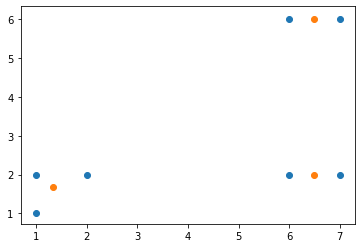

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

data=np.array([[1,1],[1,2],[2,2],[6,2],[7,2],[6,6],[7,6]])
plt.scatter(data[:,0],data[:,1], label='True Position')
plt.scatter(centroids_ans[:,0],centroids_ans[:,1])